In [49]:
#데이터 다운로드
#node 수 5000개 이하
!wget https://snap.stanford.edu/data/wikispeedia/wikispeedia_paths-and-graph.tar.gz
!tar xvfz wikispeedia_paths-and-graph.tar.gz

--2024-12-10 18:35:51--  https://snap.stanford.edu/data/wikispeedia/wikispeedia_paths-and-graph.tar.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9901821 (9.4M) [application/x-gzip]
Saving to: ‘wikispeedia_paths-and-graph.tar.gz.1’

wikispeedia_paths-a 100%[===================>]   9.44M  2.87MB/s    in 3.4s    

2024-12-10 18:35:55 (2.74 MB/s) - ‘wikispeedia_paths-and-graph.tar.gz.1’ saved [9901821/9901821]

wikispeedia_paths-and-graph/
wikispeedia_paths-and-graph/paths_finished.tsv
wikispeedia_paths-and-graph/paths_unfinished.tsv
wikispeedia_paths-and-graph/articles.tsv
wikispeedia_paths-and-graph/categories.tsv
wikispeedia_paths-and-graph/links.tsv
wikispeedia_paths-and-graph/shortest-path-distance-matrix.txt


In [50]:
!head -n 20 wikispeedia_paths-and-graph/articles.tsv
!head -n 20 wikispeedia_paths-and-graph/links.tsv


# The list of all articles.
# Article names are URL-encoded; e.g., in Java they can be decoded using java.net.URLDecoder.decode(articleName, "UTF-8").
# FORMAT:   article
#
# When publishing on this data set, please cite:
# (1) Robert West and Jure Leskovec:
#     Human Wayfinding in Information Networks.
#     21st International World Wide Web Conference (WWW), 2012.
# (2) Robert West, Joelle Pineau, and Doina Precup:
#     Wikispeedia: An Online Game for Inferring Semantic Distances between Concepts.
#     21st International Joint Conference on Artificial Intelligence (IJCAI), 2009.

%C3%81ed%C3%A1n_mac_Gabr%C3%A1in
%C3%85land
%C3%89douard_Manet
%C3%89ire
%C3%93engus_I_of_the_Picts
%E2%82%AC2_commemorative_coins
10th_century
11th_century
# The list of all links between articles.
# Article names are URL-encoded; e.g., in Java they can be decoded using java.net.URLDecoder.decode(articleName, "UTF-8").
# FORMAT:   linkSource   linkTarget
#
# When publishing on this data set, please cite

In [51]:
import networkx as nx
from urllib.parse import unquote

G = nx.DiGraph()

with open("wikispeedia_paths-and-graph/articles.tsv") as f:
  for line in f:
    line = line.strip()
    if line == "" or line[0] == "#": continue

    node = unquote(line)

    G.add_node(node)


with open("wikispeedia_paths-and-graph/links.tsv") as f:
  for line in f:
    line = line.strip()
    if line == "" or line[0] == "#": continue

    u, v = line.split()
    u = unquote(u)
    v = unquote(v)

    G.add_edge(u, v)

In [52]:
n_nodes = len(G.nodes())
n_edges = len(G.edges)
n_triangles = sum(nx.triangles(G.to_undirected()).values()) //3

#graph density
density = n_edges*2 / (n_nodes* (n_nodes-1))

print("# nodes:", n_nodes)
print("# nides:", n_nodes)
print("# density:", density)
print("# triangles:", n_triangles)




# nodes: 4604
# nides: 4604
# density: 0.011313778854231923
# triangles: 550545


In [53]:
triangles = nx.triangles(G.to_undirected())

In [54]:
node_ = len(G.nodes)
edges = len(G.edges)
n_triangles = sum(nx.triangles(G.to_undirected()).values()) //3

density = edges*2/(node_*(node_-1))
print(n_triangles)
print(density)

degree = nx.degree_centrality(G)
indegree = nx.in_degree_centrality(G)
outdegree = nx.out_degree_centrality(G)
betweenness = nx.betweenness_centrality(G, 200) #bewteen 계산량 제한
closeness = nx.closeness_centrality(G)
pagerank = nx.pagerank(G)
clustering = nx.clustering(G)
triangles = nx.triangles(G.to_undirected())
#diameter = nx.diameter(G)


550545
0.011313778854231923


In [55]:
print("Deg Rank")
for line in sorted(degree.items(), key=lambda x: x[1], reverse=True)[:10]:
  print(line)

print("In-Deg Rank")
for line in sorted(indegree.items(), key=lambda x: x[1], reverse=True)[:10]:
  print(line)

print("Out-Deg Rank")
for line in sorted(outdegree.items(), key=lambda x: x[1], reverse=True)[:10]:
  print(line)

print("Betweenness Rank")
for line in sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:10]:
  print(line)

print("closeness Rank")
for line in sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:10]:
  print(line)

print("Pagerank Rank")
for line in sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]:
  print(line)

print("Triangle Rank")
for line in sorted(triangles.items(), key=lambda x: x[1], reverse=True)[:10]:
  print(line)

Deg Rank
('United_States', 0.40082554855529)
('United_Kingdom', 0.24766456658700847)
('Europe', 0.23723658483597654)
('France', 0.2268086030849446)
('England', 0.2005213990875516)
('Germany', 0.19813165326960677)
('World_War_II', 0.18900716923745384)
('English_language', 0.15555072778622636)
('India', 0.1503367369107104)
('Africa', 0.1496849880512709)
In-Deg Rank
('United_States', 0.3369541603302194)
('United_Kingdom', 0.21116663045839668)
('France', 0.20834238540082553)
('Europe', 0.20269389528568324)
('England', 0.16315446447968715)
('World_War_II', 0.16315446447968715)
('Germany', 0.16141646752118183)
('India', 0.132739517705844)
('English_language', 0.12991527264827285)
('London', 0.12752552683032803)
Out-Deg Rank
('United_States', 0.0638713882250706)
('Driving_on_the_left_or_right', 0.05539865305235715)
('List_of_countries', 0.05300890723441234)
('List_of_circulating_currencies', 0.051270910275907015)
('List_of_sovereign_states', 0.04692591787964371)
('Africa', 0.04605691940039105

In [56]:
nodes = G.nodes()

deg_arr = [degree[node] for node in nodes]
indeg_arr = [indegree[node] for node in nodes]
outdeg_arr = [outdegree[node] for node in nodes]
bw_arr = [betweenness[node] for node in nodes]
cl_arr = [closeness[node] for node in nodes]
pg_arr = [pagerank[node] for node in nodes]
cc_arr = [clustering[node] for node in nodes]
tr_arr = [triangles[node] for node in nodes]



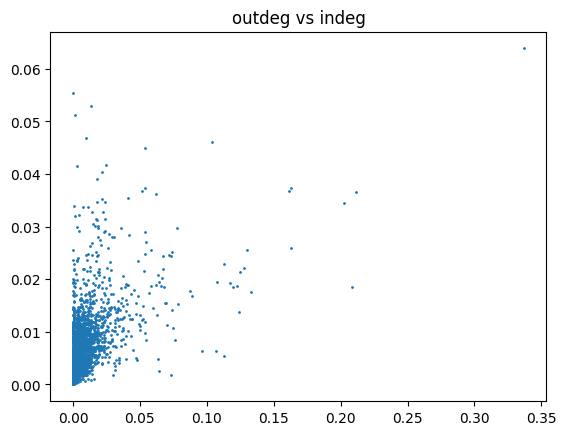

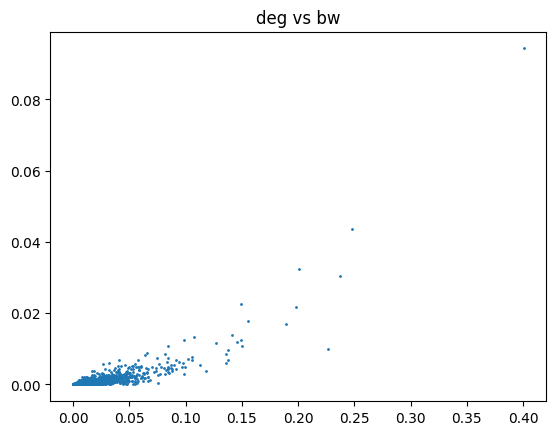

In [57]:
import matplotlib.pyplot as plt

plt.title("outdeg vs indeg")
plt.scatter(indeg_arr, outdeg_arr, s=1)
plt.show()

plt.title("deg vs bw")
plt.scatter(deg_arr, bw_arr, s=1)
plt.show()

In [58]:
for node in nodes:
  if (degree[node] >= 0.35 and betweenness[node] >= 0.08):
    print(node)

United_States


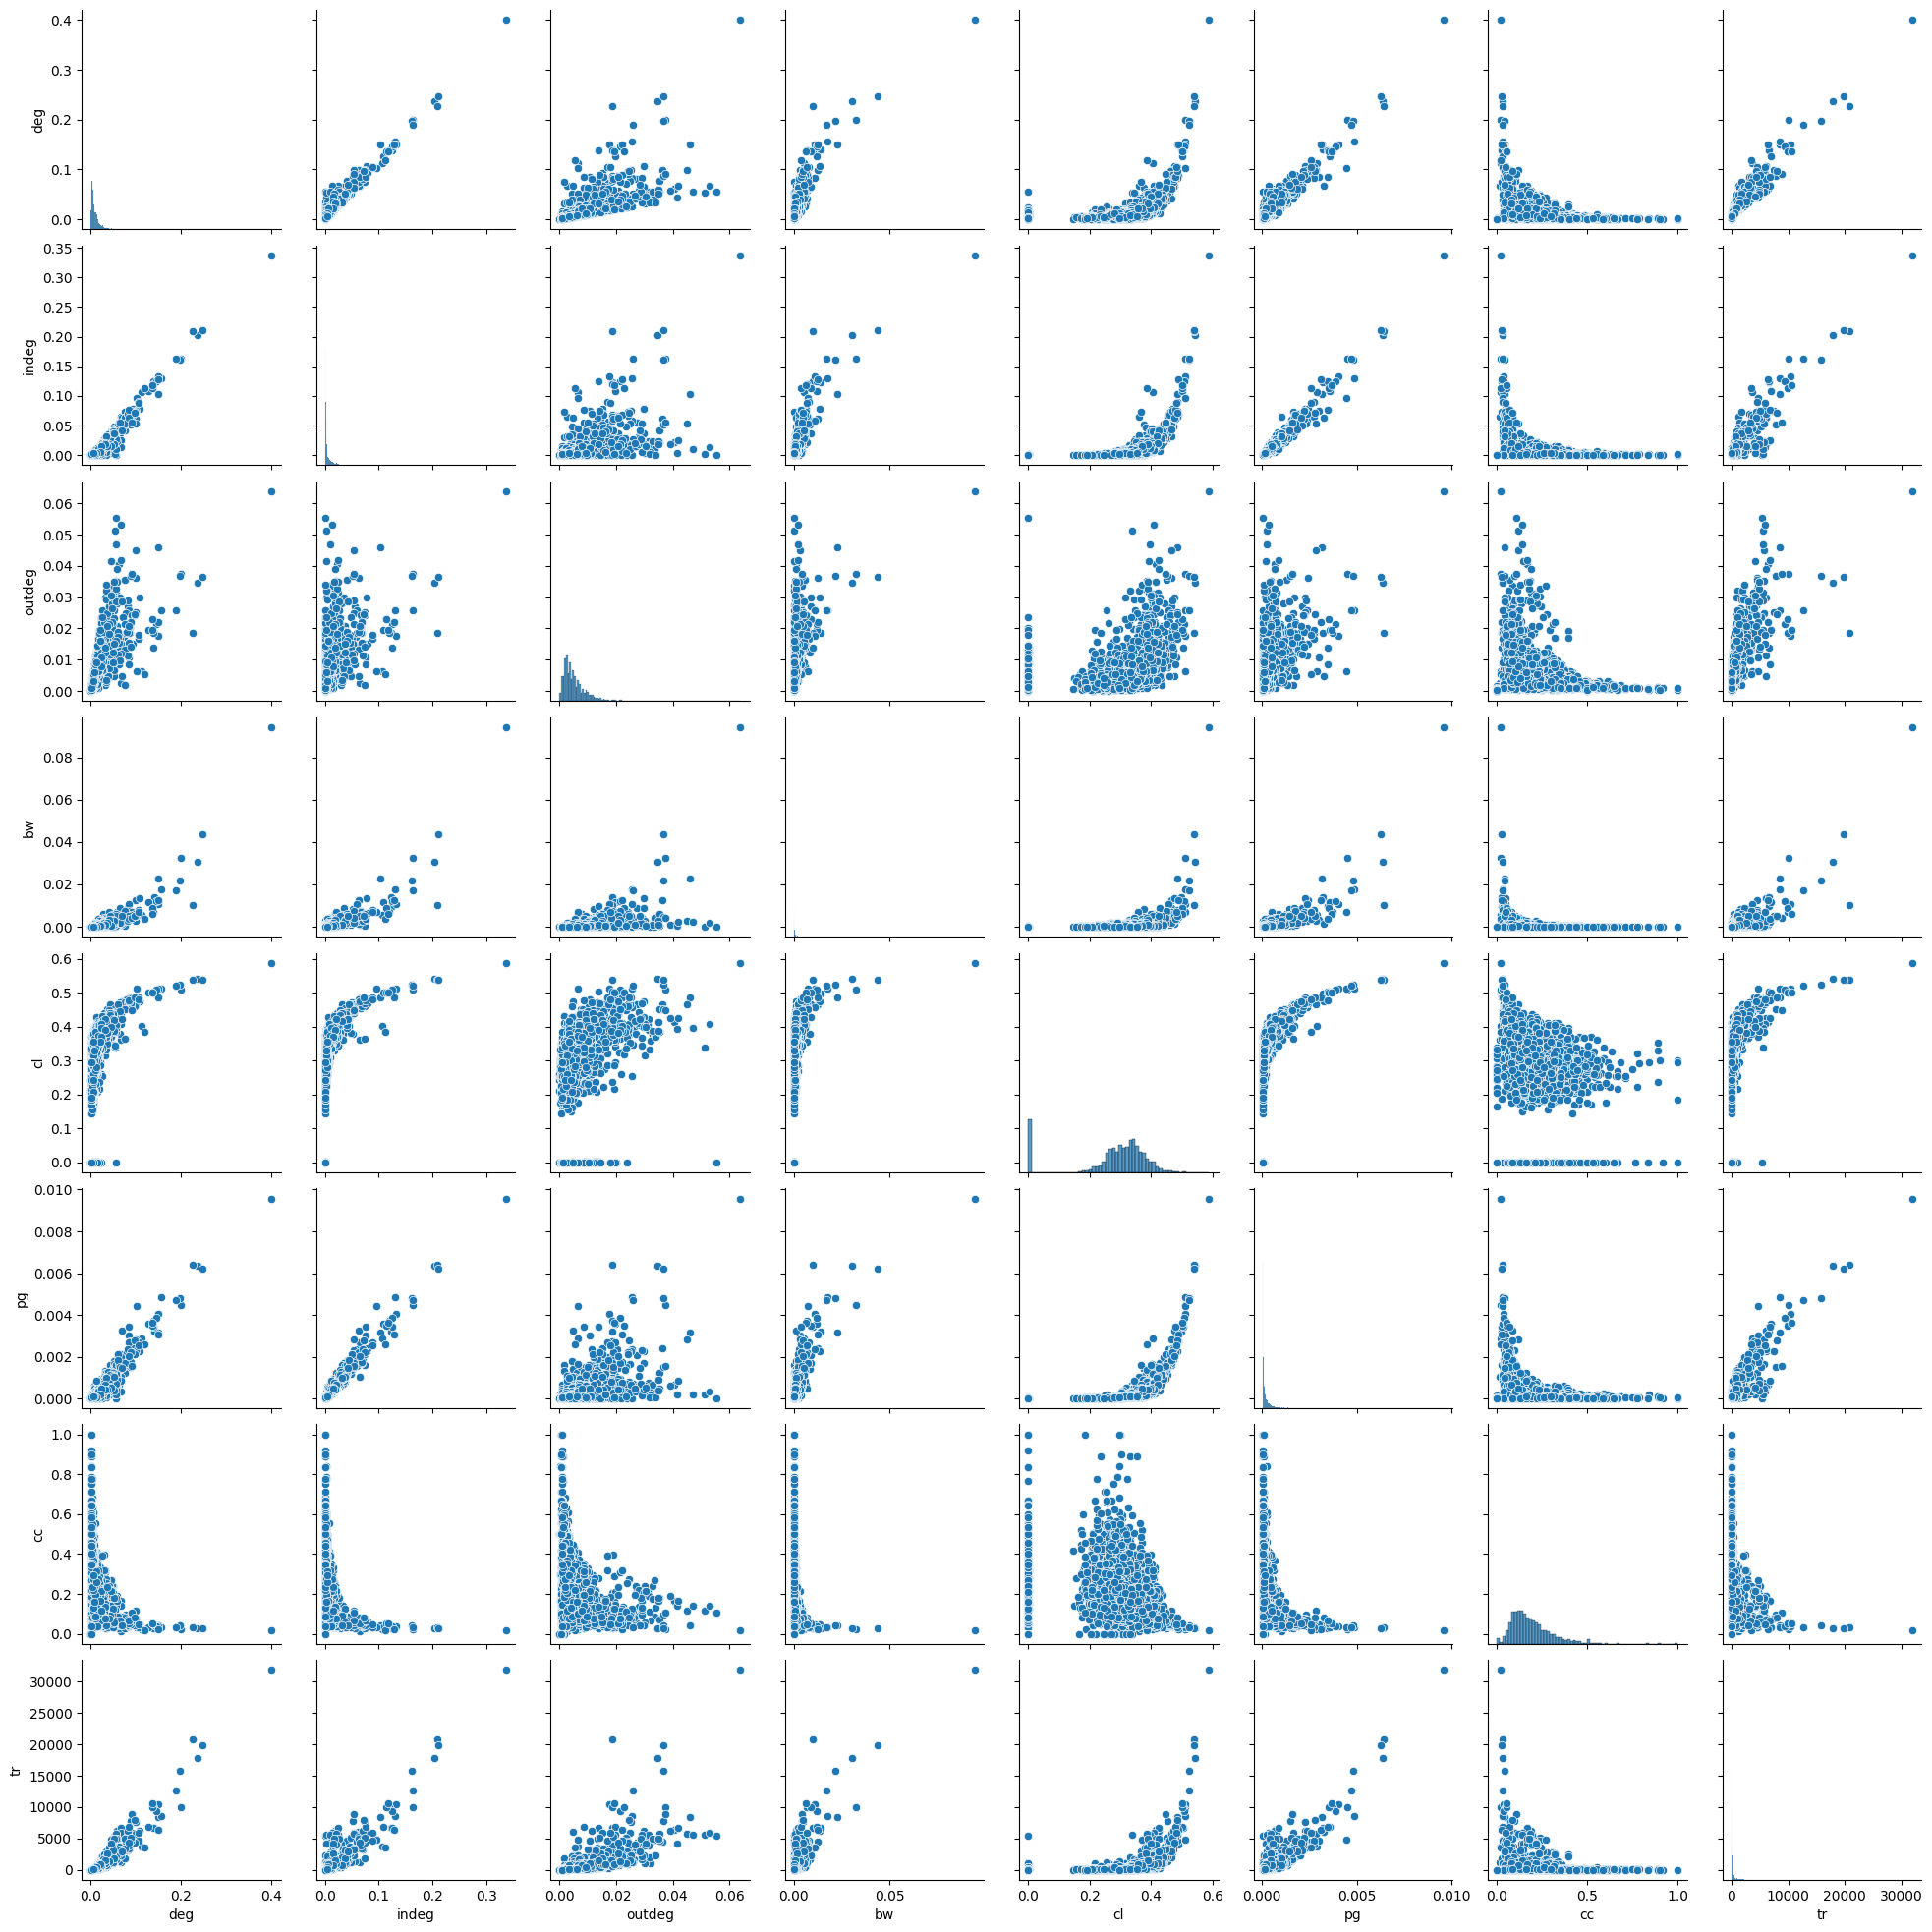

In [59]:
#seaborn을 사용하여 간단하게 그리기
import seaborn as sns
import pandas as pd
import numpy as np

a = np.array([deg_arr, indeg_arr, outdeg_arr ,bw_arr, cl_arr, pg_arr, cc_arr, tr_arr]).T
df = pd.DataFrame(a, columns=["deg", "indeg", "outdeg", "bw", "cl", "pg", "cc", "tr"])
sns.pairplot(df)
plt.show()
